In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv(r"C:\Users\hp\files_data.csv")
df

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,ProductId: B001E4KFG0,UserId: A3SGXH7AUHU8GW,ProfileName: delmartian,HelpfulnessNumerator: 1,HelpfulnessDenominator: 1,Score: 5,Time: 1303862400,ReviewSummary: Good Quality Dog Food,ReviewText: I have bought several of the Vital...
1,1,ProductId: B00171APVA,UserId: A21BT40VZCCYT4,ProfileName: Carol A. Reed,HelpfulnessNumerator: 0,HelpfulnessDenominator: 0,Score: 5,Time: 1351209600,ReviewSummary: Healthy Dog Food,ReviewText: This is a very healthy dog food. G...
2,2,ProductId: B0019CW0HE,UserId: A2P6ACFZ8FTNVV,ProfileName: Melissa Benjamin,HelpfulnessNumerator: 0,HelpfulnessDenominator: 1,Score: 1,Time: 1331164800,ReviewSummary: Bad,ReviewText: I fed this to my Golden Retriever ...
3,3,ProductId: B006F2NYI2,UserId: A132DJVI37RB4X,ProfileName: Scottdrum,HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 2,Time: 1332374400,"ReviewSummary: Not hot, not habanero","ReviewText: I have to admit, I was a sucker fo..."
4,4,ProductId: B000P41A28,UserId: A82WIMR4RSVLI,ProfileName: Emrose mom,HelpfulnessNumerator: 0,HelpfulnessDenominator: 1,Score: 4,Time: 1337472000,ReviewSummary: The best weve tried so far,ReviewText: We have a 7 week old... He had gas...
...,...,...,...,...,...,...,...,...,...,...
568449,568449,ProductId: B000LQORDE,UserId: AL22WN8RBBOW7,"ProfileName: LifeInTheCity ""trogg""",HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 5,Time: 1256428800,ReviewSummary: Good Stuff,ReviewText: I love these noodle. A little to ...
568450,568450,ProductId: B000LQORDE,UserId: A2P7HIRYYWVOBD,ProfileName: Mason,HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 5,Time: 1254096000,ReviewSummary: yummy!,ReviewText: I just love it and will buy anothe...
568451,568451,ProductId: B000LQORDE,UserId: A1K0ZH5MQFBA77,ProfileName: jennilight,HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 4,Time: 1250985600,ReviewSummary: Tastes like More!,ReviewText: My late father in law used to have...
568452,568452,ProductId: B000LQORDE,UserId: A29FRN2O7LWINL,ProfileName: T. Tsai,HelpfulnessNumerator: 2,HelpfulnessDenominator: 5,Score: 5,Time: 1237766400,ReviewSummary: Great ramen,ReviewText: This is my favorite brand of Korea...


In [2]:
df=df.drop('Unnamed: 0',axis=1)
print(df.shape)


(568454, 11)


In [8]:
def score_review(score):
    if score==1 or score==2:
        return 'Negative'
    elif score==3:
        return "Neutral"
    else:
        return "Positive"
    

In [9]:
df['Sentiment']=df['Score'].apply(score_review)

In [10]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Positive,0.0
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,Negative,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",Negative,0.4
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,Positive,0.0


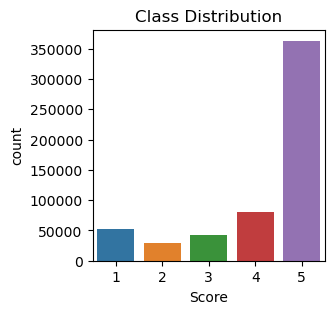

In [11]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Score')

plt.show()

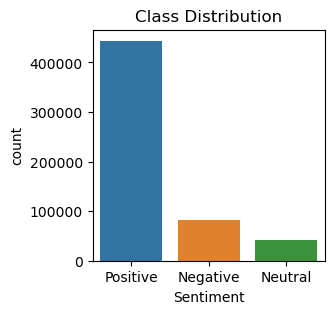

In [12]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Sentiment')

plt.show()


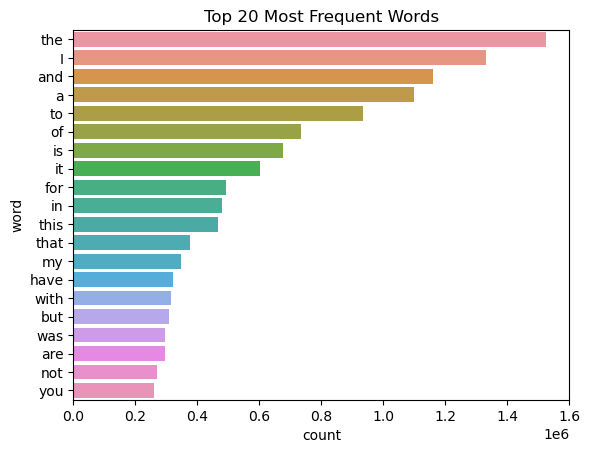

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# Get all words in the text
all_words = " ".join(df['ReviewText'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [14]:
! pip install wordcloud

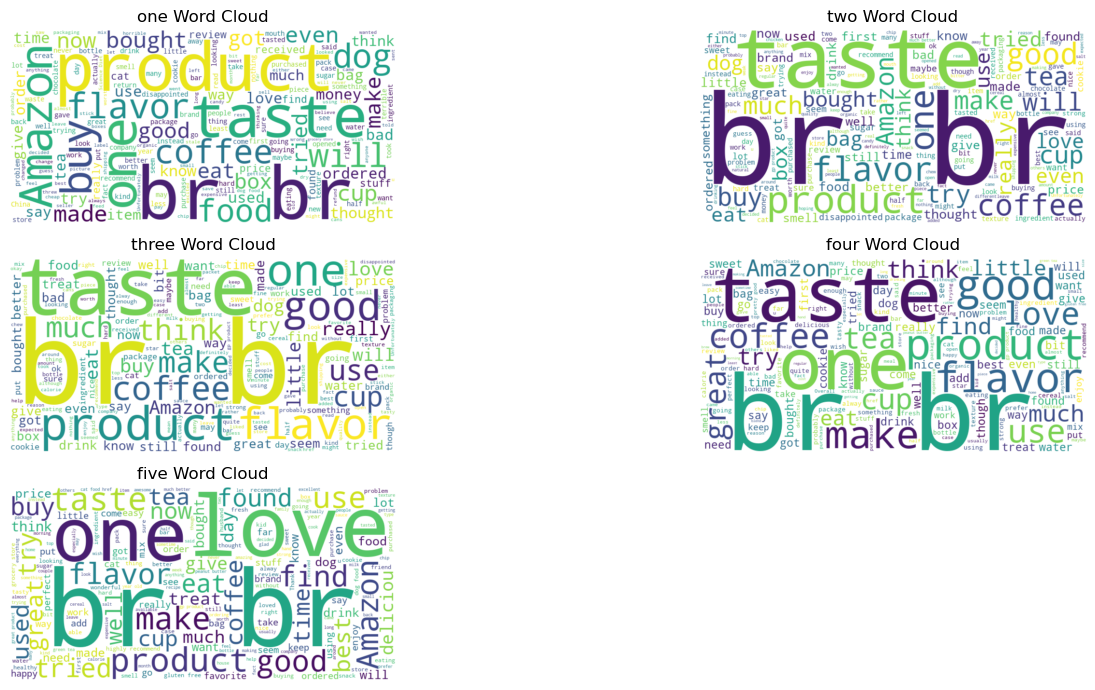

CPU times: total: 1min 53s
Wall time: 2min 59s


In [19]:
%%time
from wordcloud import WordCloud



one_review = " ".join(df[df['Score'] == 1]['ReviewText'].values)
one_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(one_review)

two_review = " ".join(df[df['Score'] == 2]['ReviewText'].values)
two_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(two_review)

three_review = " ".join(df[df['Score'] == 3]['ReviewText'].values)
three_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(three_review)

four_review = " ".join(df[df['Score'] == 4]['ReviewText'].values)
four_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(four_review)

five_review = " ".join(df[df['Score'] == 5]['ReviewText'].values)
five_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(five_review)



# Display the word clouds
fig, ax = plt.subplots(3, 2, figsize=(15, 7))
ax = ax.flatten()

ax[0].imshow(one_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('one Word Cloud')

ax[1].imshow(two_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('two Word Cloud')

ax[2].imshow(three_wordcloud, interpolation='bilinear')
ax[2].axis('off')
ax[2].set_title('three Word Cloud')

ax[3].imshow(four_wordcloud, interpolation='bilinear')
ax[3].axis('off')
ax[3].set_title('four Word Cloud')

ax[4].imshow(five_wordcloud, interpolation='bilinear')
ax[4].axis('off')
ax[4].set_title('five Word Cloud')

fig.delaxes(ax[5])

plt.tight_layout()

plt.show()

In [17]:
y = df["Sentiment"]
X = df[['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Helpfulness']]

In [25]:
df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Sentiment', 'Helpfulness'],
      dtype='object')

In [24]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(454763, 10) (454763,)
(113691, 10) (113691,)


In [26]:
pip install nltk scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\d', ' ', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess function
def preprocess(text):
    text = clean_text(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Only lemmatize
    return ' '.join(words)

# Assuming df is already defined and contains 'ReviewText' column
df['processed_text'] = df['ReviewText'].apply(preprocess)
print(df['processed_text'])


0         bought several vitality canned dog food produc...
1         healthy dog food good digestion also good smal...
2         fed golden retriever hated eat gave terrible d...
3         admit sucker large quantity oz shopping hot sa...
4         week old gas constipation problem first week t...
                                ...                        
568449                 love noodle little spicy wife perfct
568450                   love buy another box done last one
568451              late father law used rating system meal
568452    favorite brand korean ramen spicy used eating ...
568453    like noodle although say spicy somewhat unders...
Name: processed_text, Length: 568454, dtype: object


In [29]:
 !pip install tqdm


In [31]:
from tqdm import tqdm
import pandas as pd

# Define the clean function
def clean(doc):
    # Example cleaning steps:
    # Convert to lowercase
    cleaned_doc = doc.lower()
    # Remove punctuation (you can add more cleaning steps as needed)
    cleaned_doc = ''.join(char for char in cleaned_doc if char.isalnum() or char.isspace())
    return cleaned_doc

# Register `pandas.progress_apply` with `tqdm`
tqdm.pandas()

# Use `progress_apply` instead of `apply`
X_train['processed_text'] = X_train['ReviewText'].progress_apply(lambda doc: clean(doc))

# Display the DataFrame
print(X_train.head())


100%|███████████████████████████████████████████████████████████████████████| 454763/454763 [00:25<00:00, 17496.21it/s]


         ProductId          UserId                                ProfileName  \
251349  B004SI9B46  A1KB8EA3SAFPEH  S. Paola "I Save More so I can Shop More"   
523262  B000Q0IMOK  A14B8YV1Z5REP3                                 A. Olinger   
224543  B001E5E3AI   A175N19FS2B4J                               Lisa M. Mims   
291632  B003JA5KKS  A2YSCUIDZCNMPN                        Joan Ingle "jingle"   
37385   B000LRH9GK  A15RO5PRZ0VR19                                   Wing-nut   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
251349                     0                       1      2  1338163200   
523262                     0                       0      5  1322179200   
224543                    38                      46      1  1255132800   
291632                     0                       0      5  1345680000   
37385                      1                       1      5  1200009600   

                            ReviewSummary  \
251349           

In [32]:
from tqdm import tqdm, tqdm_notebook

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
X_train['processed_text'] = X_train['ReviewText'].progress_apply(lambda doc: clean(doc))

X_train.head()

100%|███████████████████████████████████████████████████████████████████████| 454763/454763 [00:27<00:00, 16421.00it/s]


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,processed_text
251349,B004SI9B46,A1KB8EA3SAFPEH,"S. Paola ""I Save More so I can Shop More""",0,1,2,1338163200,Not a fan,Let me caveat this review by saying I'm not a ...,0.000000,let me caveat this review by saying im not a b...
523262,B000Q0IMOK,A14B8YV1Z5REP3,A. Olinger,0,0,5,1322179200,Yum!,This Cocoa came to me packaged air tight and s...,0.000000,this cocoa came to me packaged air tight and s...
224543,B001E5E3AI,A175N19FS2B4J,Lisa M. Mims,38,46,1,1255132800,Not Gluten Free.,I've been gluten free for ten years. I'm o.k....,0.826087,ive been gluten free for ten years im ok enou...
291632,B003JA5KKS,A2YSCUIDZCNMPN,"Joan Ingle ""jingle""",0,0,5,1345680000,"A ""must have"" for that second cup",Every morning this is my second cup. It's smoo...,0.000000,every morning this is my second cup its smooth...
37385,B000LRH9GK,A15RO5PRZ0VR19,Wing-nut,1,1,5,1200009600,Delectable Flavor,This is a delectable sweet pepper sauce. It i...,1.000000,this is a delectable sweet pepper sauce it is...


In [33]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
X_test['processed_text'] = X_test['ReviewText'].progress_apply(lambda doc: clean(doc))

X_test.head()


100%|███████████████████████████████████████████████████████████████████████| 113691/113691 [00:05<00:00, 19729.51it/s]


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,processed_text
165256,B001CGRNM4,AOO0KGMGQR5N3,Susan M. Badar,6,7,5,1239235200,Navitas Organic Dried Goji Berry Powder,This product was an exceptional find. I have b...,0.857143,this product was an exceptional find i have be...
231465,B000EMAZQ8,AKO0R0REWAT3K,H. Chambers,2,2,4,1155686400,Lipton instant tea,"My husband likes quick and easy iced tea, ther...",1.000000,my husband likes quick and easy iced tea there...
427827,B000EVG87Y,A2FRFAQCWZJT3Q,"B. Davis ""The Happy Hermit""",0,0,5,1234224000,Good but I wish it had less sodium,The flavor of this mix is very good and the th...,0.000000,the flavor of this mix is very good and the th...
433954,B000CQE3IC,A1DRL1EDXXRTCU,Kairu,1,1,5,1334534400,Great product at a great price!,My order was hassle free and processed swiftly...,1.000000,my order was hassle free and processed swiftly...
70260,B000CQID1A,A1N6WRGNN0F5FT,Trip Kirby,0,0,4,1220572800,Very good,My favorite flavor but these sticks are very l...,0.000000,my favorite flavor but these sticks are very l...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568427 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Sentiment               568454 non-null  object 
 10  Helpfulness             568454 non-null  float64
 11  processed_text          568454 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 52.0+ MB


In [35]:
df['Sentiment'].value_counts()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

In [36]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [37]:
df['processed_text'].value_counts()

processed_text
span class tiny length                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

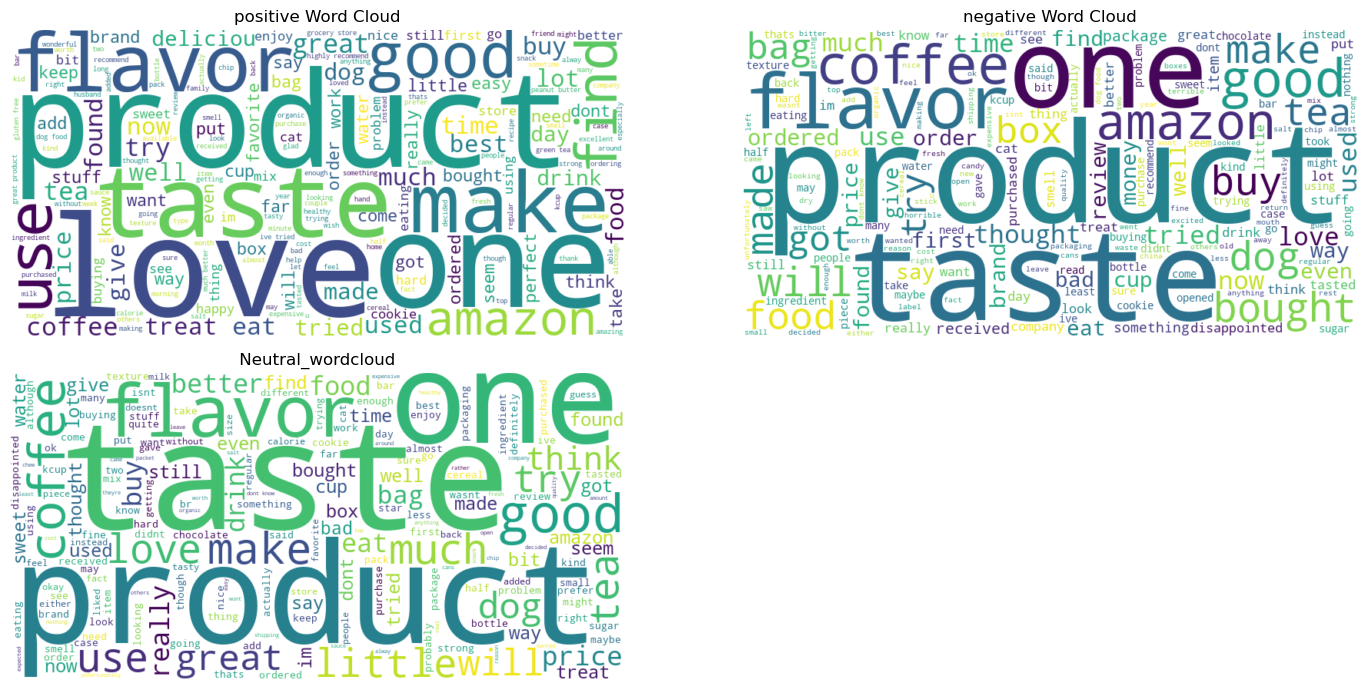

CPU times: total: 1min 17s
Wall time: 2min 5s


In [38]:
%%time
positive_text = " ".join(X_train[y_train == 'Positive']['processed_text'].values)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

negative_text = " ".join(X_train[y_train == 'Negative']['processed_text'].values)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

Neutral_text = " ".join(X_train[y_train == 'Neutral']['processed_text'].values)
Neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Neutral_text)


# Display the word clouds
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.flatten()

ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('positive Word Cloud')

ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('negative Word Cloud')

ax[2].imshow(Neutral_wordcloud, interpolation='bilinear')
ax[2].axis('off')
ax[2].set_title(' Neutral_wordcloud ')



fig.delaxes(ax[3])

plt.tight_layout()

plt.show()


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the CountVectorizer instance
bow_vect = CountVectorizer()

# Fit the vectorizer on the training data
X_train_transformed = bow_vect.fit_transform(X_train['processed_text'])

# Transform the test data
X_test_transformed = bow_vect.transform(X_test['processed_text'])

# Print the shape of the transformed test data
print(f"Shape of X_test_transformed: {X_test_transformed.shape}")


Shape of X_test_transformed: (113691, 200354)


In [42]:
X_test_transformed = bow_vect.transform(X_test['processed_text'])

print(f"Shape of X_test_transformed: {X_test_transformed.shape}")


Shape of X_test_transformed: (113691, 200354)


In [43]:
X_test

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,processed_text
165256,B001CGRNM4,AOO0KGMGQR5N3,Susan M. Badar,6,7,5,1239235200,Navitas Organic Dried Goji Berry Powder,This product was an exceptional find. I have b...,0.857143,this product was an exceptional find i have be...
231465,B000EMAZQ8,AKO0R0REWAT3K,H. Chambers,2,2,4,1155686400,Lipton instant tea,"My husband likes quick and easy iced tea, ther...",1.000000,my husband likes quick and easy iced tea there...
427827,B000EVG87Y,A2FRFAQCWZJT3Q,"B. Davis ""The Happy Hermit""",0,0,5,1234224000,Good but I wish it had less sodium,The flavor of this mix is very good and the th...,0.000000,the flavor of this mix is very good and the th...
433954,B000CQE3IC,A1DRL1EDXXRTCU,Kairu,1,1,5,1334534400,Great product at a great price!,My order was hassle free and processed swiftly...,1.000000,my order was hassle free and processed swiftly...
70260,B000CQID1A,A1N6WRGNN0F5FT,Trip Kirby,0,0,4,1220572800,Very good,My favorite flavor but these sticks are very l...,0.000000,my favorite flavor but these sticks are very l...
...,...,...,...,...,...,...,...,...,...,...,...
205323,B0016FRI8A,A34OXX5PQ1XEHB,va212atr,0,0,4,1275177600,Powdered Green Tea by Stash,Powdered green tea with lemon & ginger provide...,0.000000,powdered green tea with lemon ginger provides...
95366,B000S6CCJ8,A2BN37L3K5ZDYA,"Chad D. Sowald ""Chad Sowald""",12,13,5,1262390400,Superb Teas!,"After receiving a gift card for Amazon, I had ...",0.923077,after receiving a gift card for amazon i had t...
75510,B001AHL6CI,A21141I9KSEWTA,Cheryl L Logan,0,1,5,1288310400,delivery not acceptable,"I've gotten these chips before, great price an...",0.000000,ive gotten these chips before great price and ...
381923,B0034EDM2W,AYG79EUXWTRFX,Jill Doyle,0,0,4,1319500800,Good deal on a good product,We buy these because they are lower in carb th...,0.000000,we buy these because they are lower in carb th...


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['processed_text'])
X_test_transformed = vectorizer.transform(X_test['processed_text'])

# Building the Model
classifier = MultinomialNB() 
%time 
classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 0 ns
Wall time: 0 ns

Model's Accuracy: 0.8515625687169609


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Building the Model
classifier = LogisticRegression()
%time
classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model's Accuracy: 0.8673421818789526


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Building the Model
classifier = DecisionTreeClassifier()
%time
classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 0 ns
Wall time: 0 ns

Model's Accuracy: 0.8557053768548082
